# Model Performance

### Logistic Regression
Use this to solve business problems where you need to find the probability of an event occuring or not, or where you need to predict a binary outcome.  
  
**Examples**  
* Classify a subscriber as bot or human
* Predict if a customer will churn
* Calculate odds of a transaction being fraud  
  
  
  
#### Input Checklist
* Do I have enough samples? 
* Any missing values?
* Any outliers?
* Which features should I select?   
* Should I normalize my features?
* Balanced classes?
   
  
**Sample size**  
Logistic regression requires large enough sample sizes.  
Rule of thumb: N = 10 * k / p where k is number of input features and p is minority of positive samples, or minimum of 100.   

**Missing values**  
Remove missing values, or impute them. 

**Outliers**  
Drop if the data point is clearly an error or incorrect data.  
Otherwise don't drop the outlier.  Worst case, run the model with two iterations -  both with and without the outlier.  
Logistic regression doesn't require that your features are normally distributed, so don't worry about that. 

**Feature selection**  
Create a correlation matrix and consider selecting features with correlation to label of > 0.5.  
More features are not always better. Avoid collinearity by removing features that are highly correlated with each other.  

**Normalization**  
You don't have to normalize the data for logistic regression. However, interpreting the results can be easier if you do some normalization.  
  
**Balanced classes**  
Rule of thumb: a ratio of 1:10 in label classes is imbalanced enough to need adjustment.  
You can downsample the abundant class.  
Or you could use class weights in the model. sklearn has this option, but it is not implemented in statsmodel yet.

In [1]:
# Input Example

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score, plot_precision_recall_curve


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv')
df.head()

# predict if a candy is chocolate or not based on other features

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [2]:
# Things to Check 

# Do I have enough samples? 
print(df.describe())

# Are there missing values? 
print(df.isnull().sum())

       chocolate     fruity    caramel  peanutyalmondy     nougat  \
count  85.000000  85.000000  85.000000       85.000000  85.000000   
mean    0.435294   0.447059   0.164706        0.164706   0.082353   
std     0.498738   0.500140   0.373116        0.373116   0.276533   
min     0.000000   0.000000   0.000000        0.000000   0.000000   
25%     0.000000   0.000000   0.000000        0.000000   0.000000   
50%     0.000000   0.000000   0.000000        0.000000   0.000000   
75%     1.000000   1.000000   0.000000        0.000000   0.000000   
max     1.000000   1.000000   1.000000        1.000000   1.000000   

       crispedricewafer       hard        bar   pluribus  sugarpercent  \
count         85.000000  85.000000  85.000000  85.000000     85.000000   
mean           0.082353   0.176471   0.247059   0.517647      0.478647   
std            0.276533   0.383482   0.433861   0.502654      0.282778   
min            0.000000   0.000000   0.000000   0.000000      0.011000   
25%     

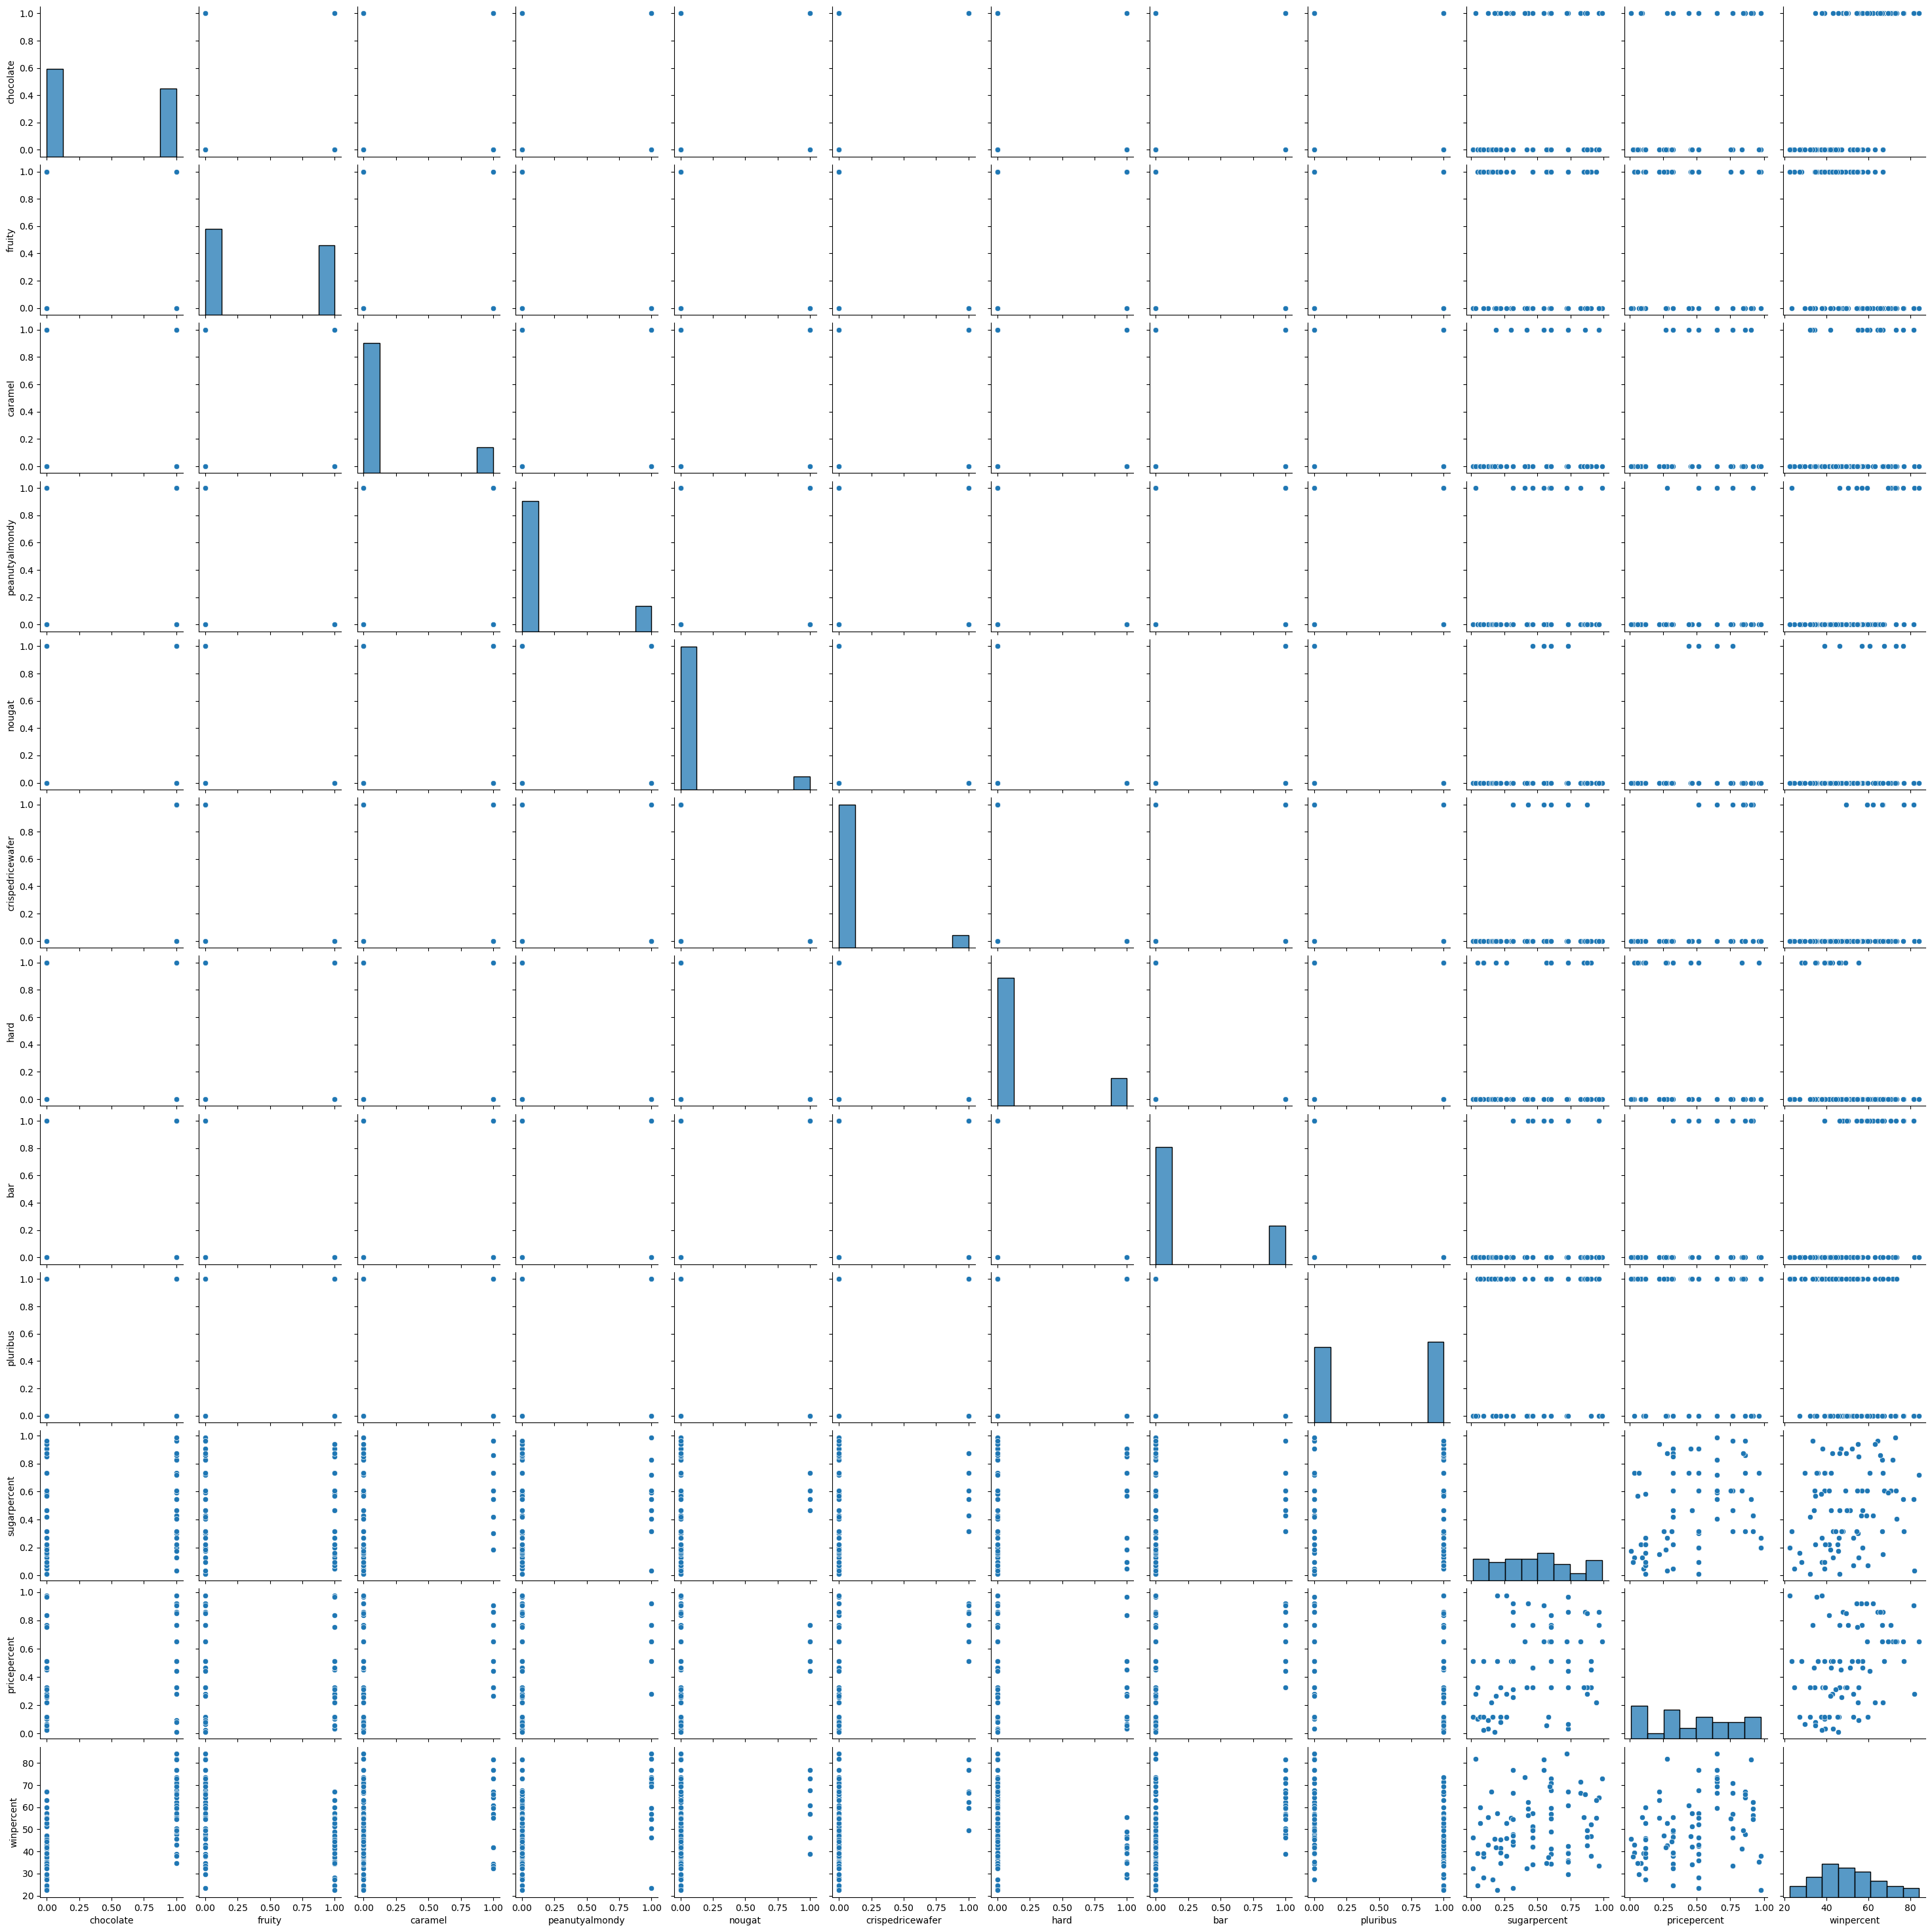

In [3]:
# Things to Check 

# Are there outliers?
sns.pairplot(data=df)


/var/folders/v0/nzpgbkrs4lv79v3ym2l3_nr1c2qysx/T/ipykernel_92818/3302863425.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


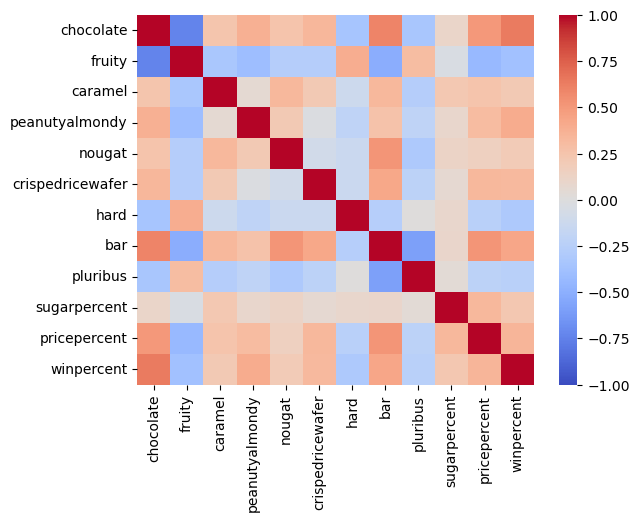

In [4]:
# Things to Check
  
# Feature selection?
# Values of 1.0 or -1.0 are highly correlated.
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, 
        cmap='coolwarm')

plt.show()

In [5]:
# Things to check

# Normalization
# Looking at the summary and plots above, most column values fall in the 0 to 1 range, and the minimum value is at or near 0. 
# We could consider normalizing df['winpercent'] so that it scales between 0 and 1. 

# Balanced classes
# Label is df['chocolate']
# Ratio is much larger than 10%, so don't worry about balancing
df['chocolate'].value_counts()/df.shape[0]

0    0.564706
1    0.435294
Name: chocolate, dtype: float64

#### Model Checklist
* Do you need to predict the label classes?
* Or do you need to predict the probability of the label?
* Which probability threshold to use?


**Predicting Label Classes - 1 or 0**
* Use accuracy metric. If you have an imbalanced dataset, use balanced accuracy instead. See confusion matrix metrics below.
* Accuracy is the number of correct predictions vs the total predictions.
* What is a good accuracy for a business model? Your baseline should be the no-skill model. A business model with accuracy above 85% would be considered a very good model.

**Predicting Probabilities**  
_Area under the Receiver Operating Characteristic curve_
* Use AUC - ROC (area under the ROC curve).   
* AUC between 0.5 and 0.7 is an acceptable model. Above 0.7 is a good model. Critical decisions (i.e., medical) should have a model with AUC of 0.95+. 
* Use to compare between different models solving a binary classification problem. 
  
_Precision-Recall Curves and AUC_
* Plot of recall vs precision
* PRC is recommended for highly skewed data; this curve focuses on the minority class - while the AUCROC focuses on both classes. 
* This metric does not use true negatives at all, so it won't be affected by a large proportion of true negatives in the data. 
* Use to compare between different models solving a binary classification problem. 


**Threshold**
* Think through what makes sense for the business problem. Threshold of 0.5 is often used. 
* Higher threshold - the model is more restrictive when classifying positive cases, so more False Negative errors will be made.
* Lower threshold - the model is being less strict, so more False Positive errors will be made. 

  
*These guidelines assume that predicting both classes are equally important, and that you have a relatively balanced dataset.*  
*There are other, more complex ways to measure performance if those assumptions are not met.*

In [6]:
# Model Example

# Define dependent and independent variables

features = df[['fruity', 'hard', 'caramel', 'sugarpercent']]
label = df['chocolate']

# Split into train and test
features_train, features_test, labels_train, labels_test = train_test_split(features, label)

# Logistic Regression model
model = LogisticRegression(fit_intercept=False, penalty='none') #turn off regularization and set to no intercept so we can compare results with statsmodels.api result later
model.fit(features_train, labels_train)

# Return feature importance - coefficients for the model
print("Coefficients", model.coef_)
print(" ")

## Predicting label class 
# Make class label predictions
labels_predictions = model.predict(features_test)
print("Class predictions", labels_predictions)

# Calculate accuracy
print("Accuracy", accuracy_score(labels_test, labels_predictions))

# What is considered a "good" accuracy? 

Coefficients [[-4.48978869 -0.80862161  1.90432363  2.50638416]]
 
Class predictions [0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1]
Accuracy 0.8181818181818182


In [7]:
## Predicting probabilities
# Predict probabilities for test data
probs = model.predict_proba(features_test)

# Keep probabilities of positive class
probs = probs[:, 1]
print("Probability predictions", probs)
print(" ")
# generate a no skill prediction (just set all the labels to the majority class)
ns_probs = [1 for _ in range(len(labels_test))]

# Get ROC curve
# fpr - false positive rate
# tpr - true positive rate
# the function returns these rates for each threshold
fpr, tpr, thresholds = roc_curve(labels_test, probs)
ns_fpr, ns_tpr, ns_thresholds = roc_curve(labels_test, ns_probs)

# Compute AUC score
# It takes the true outcomes from the test set and compares them to the predicted probabilities for the 1 class
auc = roc_auc_score(labels_test, probs)
ns_auc = roc_auc_score(labels_test, ns_probs)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))


# AUC Scores
# AUC between 0.5 and 0.7 is an acceptable model. 
# Above 0.7 is a good model. 
# Critical decisions (i.e., medical) should have a model with AUC of 0.95+.

Probability predictions [0.04258058 0.82662431 0.68664877 0.02400277 0.03474623 0.95035756
 0.66132502 0.74606705 0.04593171 0.97677431 0.81963196 0.89894591
 0.06567442 0.96826789 0.09077392 0.10609342 0.00627232 0.88773059
 0.98691328 0.01612188 0.0980568  0.76232497]
 
Logistic: ROC AUC=0.812
No Skill: ROC AUC=0.500


/Users/jmarlowe/opt/anaconda3/envs/cheatsheets/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


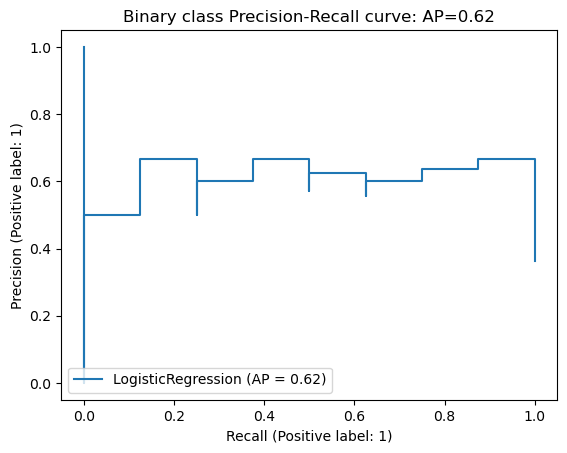

In [13]:
# Average precision score for PR-AUC
average_precision = average_precision_score(labels_test, probs)

disp = plot_precision_recall_curve(model, features_test, labels_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# AUC-PR score - perfect model would have score = 1
#AUC-PR is typically in the range of 0.5 to 1.0
# The ideal model is a horizontal line at y = 1.0 and a vertical line at x = 1.0

plt.show()

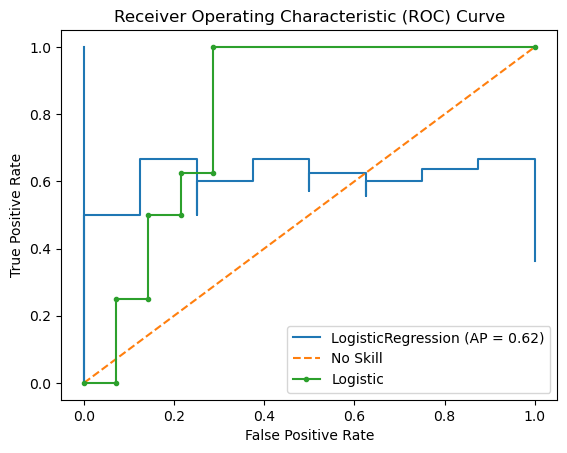

In [9]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

# The AUC-ROC curve tells how much the model is capable of distinguishing between classes. 
# The higher the AUC, the better the model is predicting zeros as zeros and ones as ones. 

# A perfect model would have a vertical line running up from x = 0.0 and a horizontal line going across from y = 1.0
# A no-skill model has AUC score of 0.5. It predicts everything as ones. This is represented as the blue dashed line. 
# If the logistic line is below the no-skill line, the model is _worse_ than no skill - it is predicting zeros as ones, and ones as zeros!


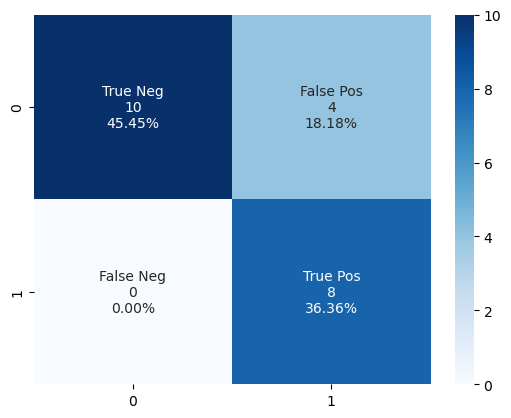

In [10]:
# Print the confusion matrix 

cf_matrix = confusion_matrix(labels_test, labels_predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.show()

# A perfect model would only have True Positives and True Negatives.
# You can optimize the confusion matrix based on your use case.
# For example, in our model False Negative would represent predicting that a chocolate candy bar was actually non-chocolate. 
# If we were using the model to classify candy bars before feeding them to people with chocolate allergies, we would want to minimize the number of False Negatives.
# However, False Positives would be no big deal - if we predict a non-chocolate candy bar is chocolate, it doesn't have any harmful effects.


### Confusion Matrix related metrics
With hotdog explainer from https://blog.nillsf.com/index.php/2020/05/23/confusion-matrix-accuracy-recall-precision-false-positive-rate-and-f-scores-explained/

![confusion matrix'](https://blog.nillsf.com/wp-content/uploads/2020/05/image-36.png)  
[image credit](https://blog.nillsf.com/index.php/2020/05/23/confusion-matrix-accuracy-recall-precision-false-positive-rate-and-f-scores-explained/)

**Accuracy**  
Measure of number of correct hotdog predictions  
*correct predictions / all predictions*

**Recall (aka Sensitivity)**  
Ability to correctly detect hotdogs that are hotdogs.  
High recall - most of the positive cases will be labeled as positive.  
*true positives / (true positives + false negatives)*

**Precision**  
If an item is predicted to be a hotdog, this metric tells how sure you can be that it actually is a hotdog.  
*true positives / (true positives + false positives)*
  
**Specificity**  
Probability that an item is not a hotdog, given that it is actually a hotdog.  
In classification report, this is recall for the negative class.   
*true negatives / (true negatives + false positives)*


**Balanced Accuracy**  
Average of recall for each class. 
Best value is 1, worst value is 0.  
Use this when you have an imbalanced dataset.  
*(sensitivity + specificity) / 2*

**F1-score**  
A way to measure a model's accuracy based on recall and precision.  
*2 x (precision x recall / (precision + recall))*

In [11]:
# Calculate the above scores
print(classification_report(labels_test, labels_predictions))

print('Balanced accuracy score', balanced_accuracy_score(labels_test, labels_predictions))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.67      1.00      0.80         8

    accuracy                           0.82        22
   macro avg       0.83      0.86      0.82        22
weighted avg       0.88      0.82      0.82        22

Balanced accuracy score 0.8571428571428572


In [12]:
# Statsmodel can also be used for generating model
# It basically copies R and uses pandas data 
# https://www.statsmodels.org/stable/index.html


import statsmodels.discrete.discrete_model as sm
smodel = sm.Logit(labels_train, features_train).fit()
smodel.summary()

Optimization terminated successfully.
         Current function value: 0.319889
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              chocolate   No. Observations:                   63
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            3
Date:                Tue, 01 Nov 2022   Pseudo R-squ.:                  0.5364
Time:                        16:12:16   Log-Likelihood:                -20.153
converged:                       True   LL-Null:                       -43.470
Covariance Type:            nonrobust   LLR p-value:                 4.159e-10
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
fruity          -4.4899      1.270     -3.535      0.000      -6.979      -2.001
hard            -0.8085      1.733     -0.466      0.641      -4.206       2.589
caramel          1.9043      1.670      1.140      0.254      -1.369       5.178
sugarpercent     2.5065      1.062      2.360      0.018       0.425       4.588
================================================================================
"""

## Interpreting the results

**Pseudo R-squared: larger is better**
* Use this to compare which run of the model provides a better prediction. Metric can't be used alone.
* Larger pseudo R-squared values are better; this is measuring how well the model can predict the data. 
* This value is the ratio of the log-likelihood of the null model to that of the full model. 

**Log-likelihood: larger is better**
* Use to compare fit of different coefficients. Metric can't be used alone.
* This value is maximized to determine optimial values of the coefficients. 

**p-values: smaller is better**
* Null hypothesis: the model explains the data just as well as chance (in this case, the coefficients would be 0)
* Alternative hypothesis: the model explains the data better than just chance (so at least one of the model coefficients is non-zero)
* p-value larger than 0.05 indicates evidence for the null hypothesis
* p-value smaller than 0.05 indicates evidence for the alternative hypothesis
* You can use the p-values to determine whether to include a feature in a model or not. Features with p-values near 0 should be kept in the model.